In [1]:
library(mboost)
library(survival)
library(penaltyLearning)
library(Hmisc)
library(caret)

Loading required package: parallel

Loading required package: stabs

This is mboost 2.9-1. See ‘package?mboost’ and ‘news(package  = "mboost")’
for a complete list of changes.


Loading required package: lattice

Loading required package: Formula

Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following object is masked from ‘package:mboost’:

    %+%



Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units



Attaching package: ‘caret’


The following object is masked from ‘package:survival’:

    cluster




In [2]:
data_import =function(dataname){
  filename = paste('https://raw.githubusercontent.com/avinashbarnwal/GSOC-2019/master/AFT/test/data/neuroblastoma-data-master/data/',dataname,'/',sep="")
  inputFileName = paste(filename,'inputs.csv',sep="")
  labelFileName = paste(filename,'outputs.csv',sep="")
  foldsFileName = paste(filename,'cv/equal_labels/folds.csv',sep="")
  inputs        = read.table(inputFileName,sep=",",header=T,stringsAsFactors = F,row.names=1)
  labels        = read.table(labelFileName,sep=",",header=T,stringsAsFactors = F,row.names=1)
  folds         = read.table(foldsFileName,sep=",",header=T,stringsAsFactors = F,row.names=1)
  res           = list()
  res$inputs    = inputs
  res$labels    = labels
  res$folds     = folds
  return(res)
}

In [3]:
data_massage = function(inputs,labels){
    rownamesInput = rownames(inputs)
    inputs        = do.call(data.frame,lapply(inputs, function(x) replace(x, is.infinite(x),NA)))
    naColumns     = colnames(inputs)[colSums(is.na(inputs))>0]
    noVarCol      = getNonVarCols(inputs)
    removeCols    = c(naColumns,noVarCol)
    inputs        = inputs[ , !(colnames(inputs) %in% removeCols)]
    rownames(inputs) = rownamesInput
    labels$min.log.lambda = unlist(lapply(labels$min.log.lambda,exp))
    labels$max.log.lambda = unlist(lapply(labels$max.log.lambda,exp))
    res        = list()
    res$inputs = inputs
    res$labels = labels
    return(res)
}

In [4]:
getXY<-function(foldNo,folds,inputs,labels){
    test.id       = rownames(subset(folds,fold==foldNo))
    train.id      = rownames(subset(folds,fold!=foldNo))
    X             = subset(inputs,rownames(inputs) %in% train.id)
    X             = as.matrix(X)
    X.val         = subset(inputs,rownames(inputs) %in% test.id)
    X.val         = as.matrix(X.val)
    y.label       = subset(labels,rownames(labels) %in% train.id)
    y.label.test  = subset(labels,rownames(labels) %in% test.id)
    y.lower       = as.matrix(y.label$min.log.lambda)
    y.upper       = as.matrix(y.label$max.log.lambda)
    y.lower.val   = as.matrix(y.label.test$min.log.lambda)
    y.upper.val   = as.matrix(y.label.test$max.log.lambda)
    res           = list()
    res$X         = X
    res$X.val     = X.val
    res$y.lower      = y.lower
    res$y.lower.val  = y.lower.val
    res$y.upper      = y.upper
    res$y.upper.val  = y.upper.val
    return(res)
}

In [5]:
getNonVarCols<-function(data){
    var_columns    = apply(inputs,2,var)
    resCol         = names(var_columns[var_columns==0.0])
    return(resCol)
}

In [6]:
# Set Parameters
dataNameRange       = c('ATAC_JV_adipose','CTCF_TDH_ENCODE','H3K27ac-H3K4me3_TDHAM_BP','H3K27ac_TDH_some','H3K36me3_AM_immune')
sigma_range         = c(1,2,5,10,100)
distribution_range  = c('normal','logistic','extreme')
learning_rate       = 0.1
num_round           = 200

In [12]:
res                 = data_import(dataNameRange[1])
inputs              = res$inputs
labels              = res$labels
folds               = res$folds
resDataMassage      = data_massage(inputs,labels)
inputs              = resDataMassage$inputs
labels              = resDataMassage$labels
fold_iter           = unique(folds$fold)
accuracy_fold       = numeric(length(fold_iter))
coef_model          = list()

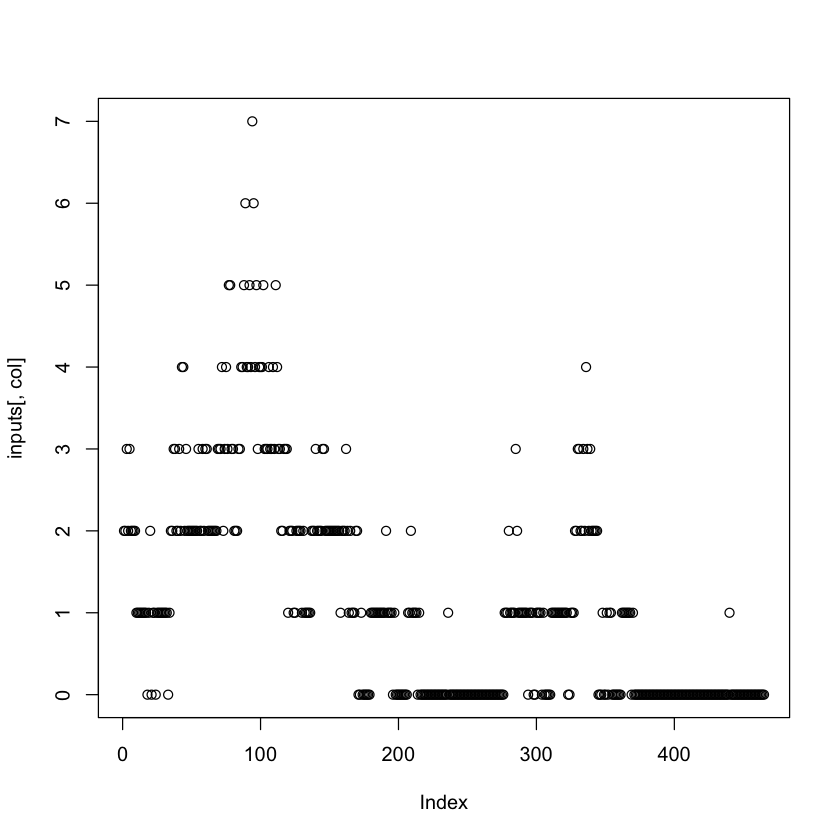

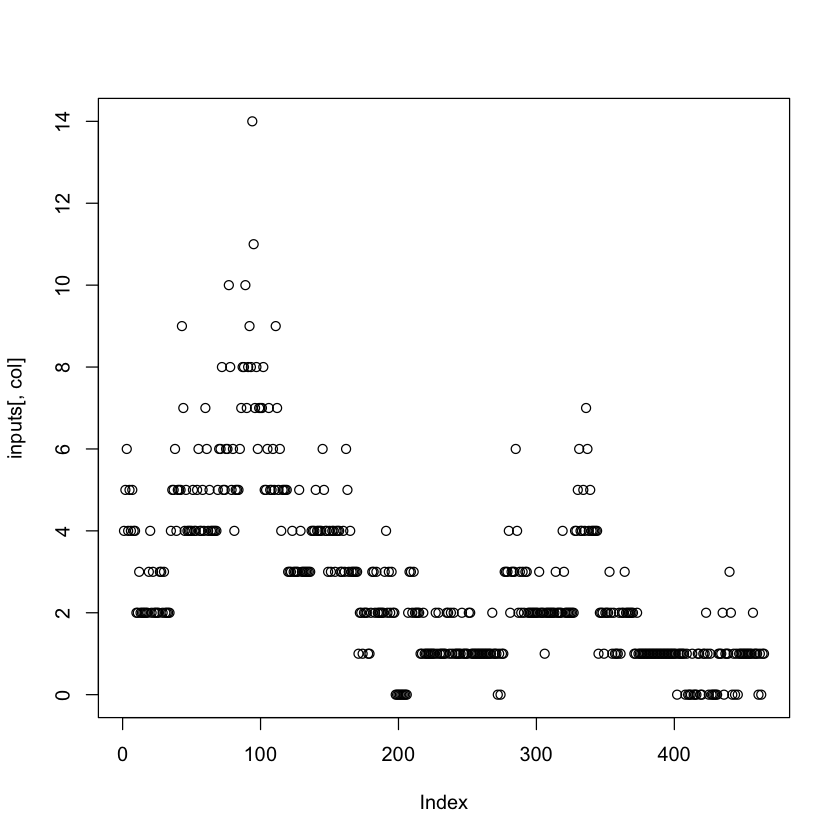

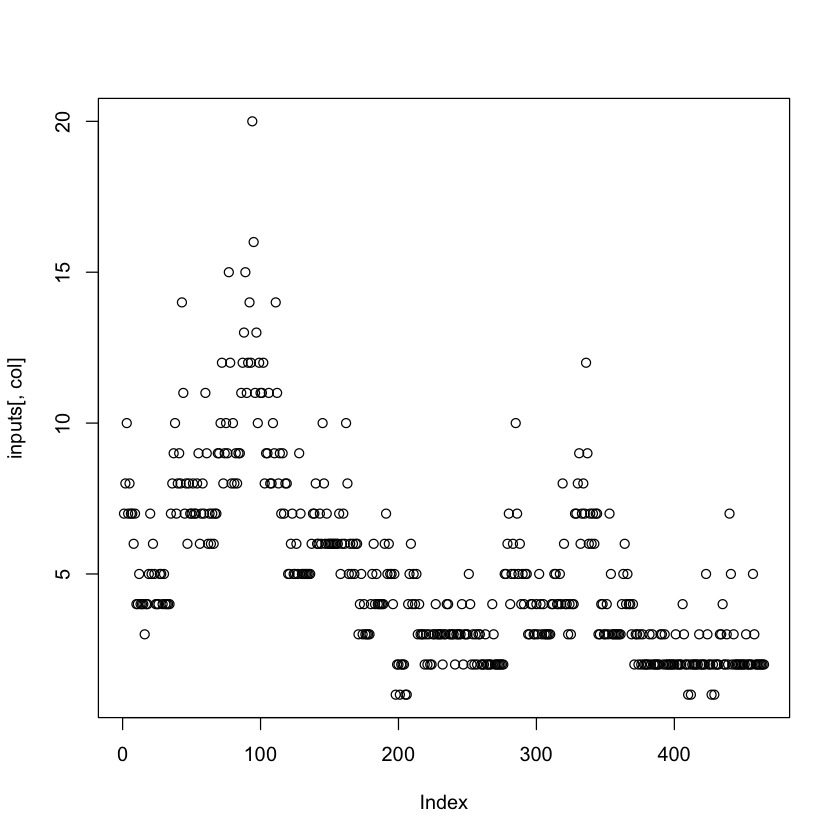

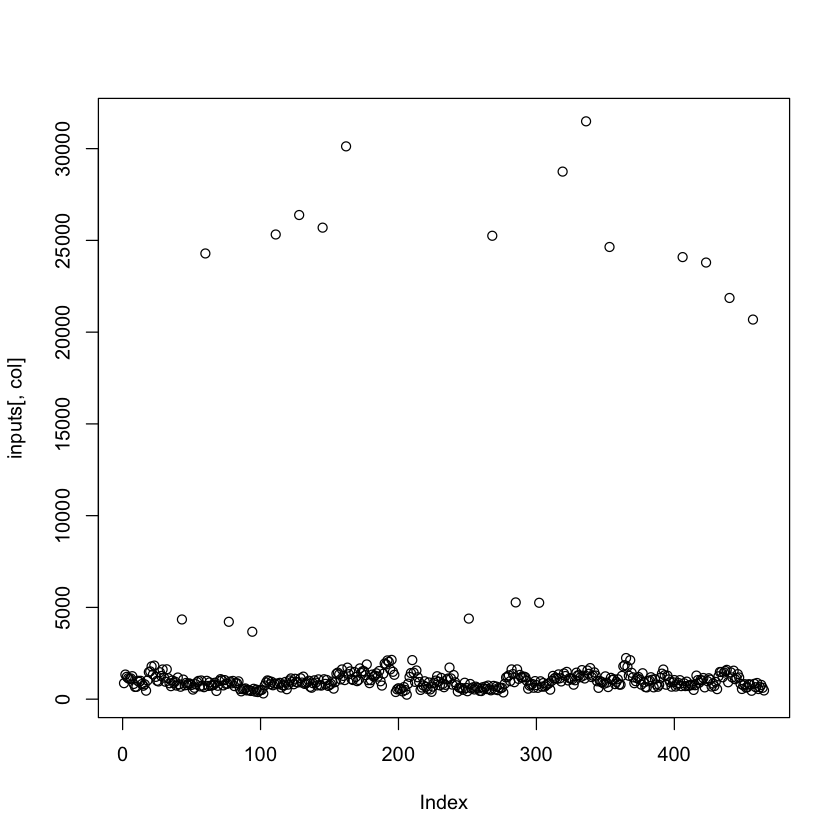

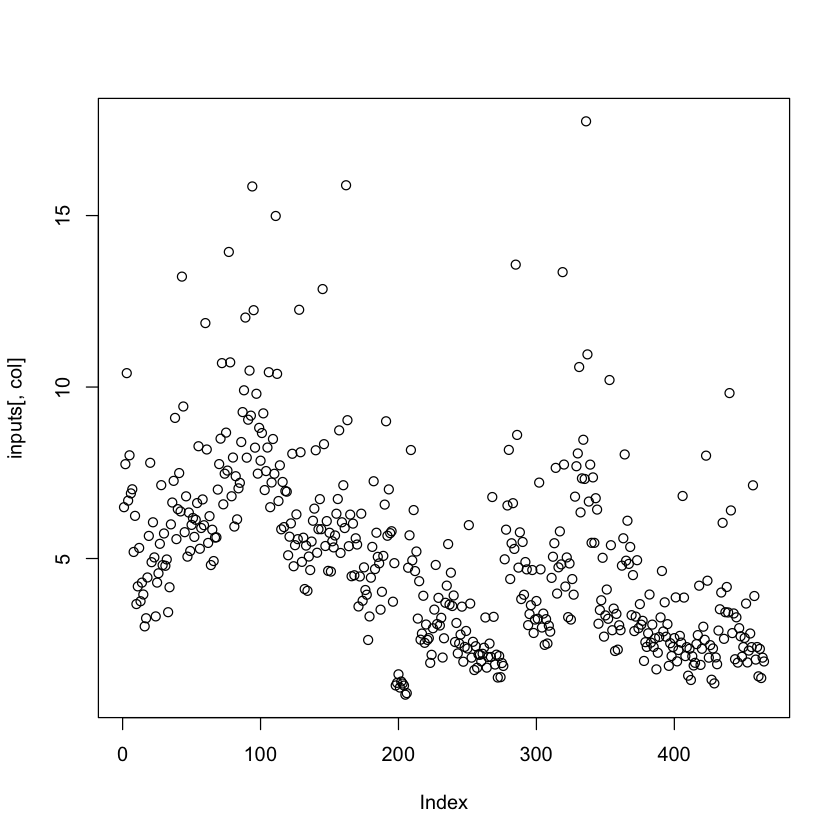

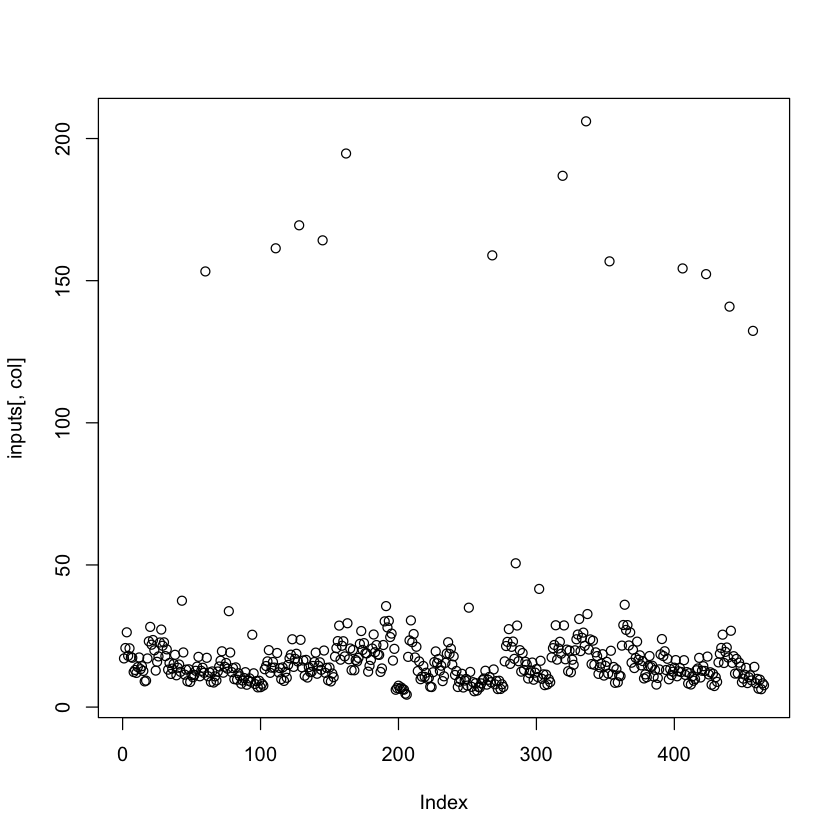

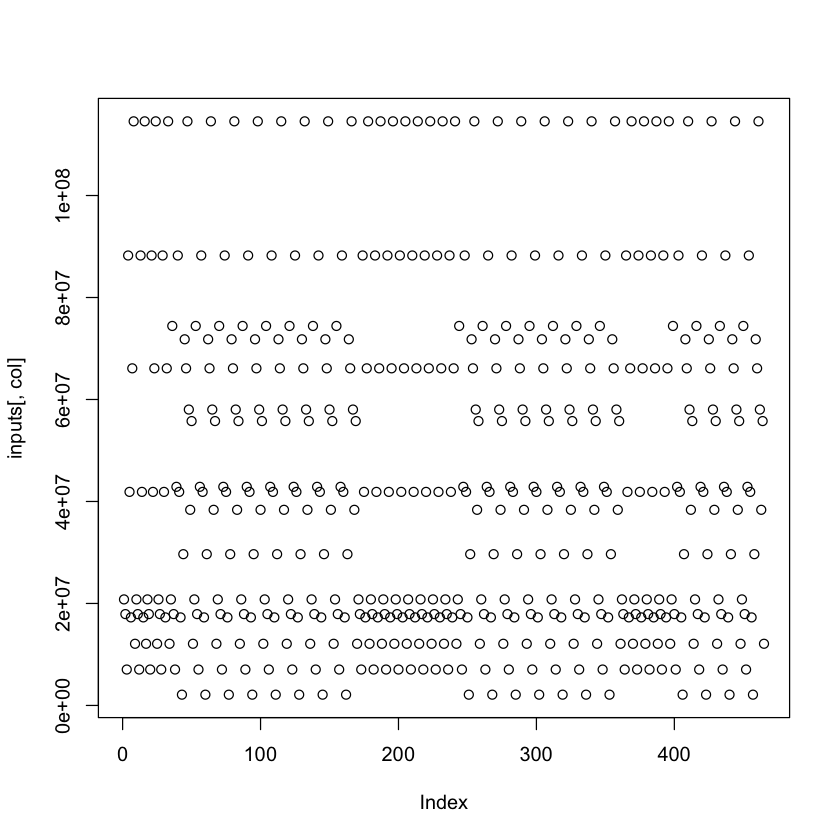

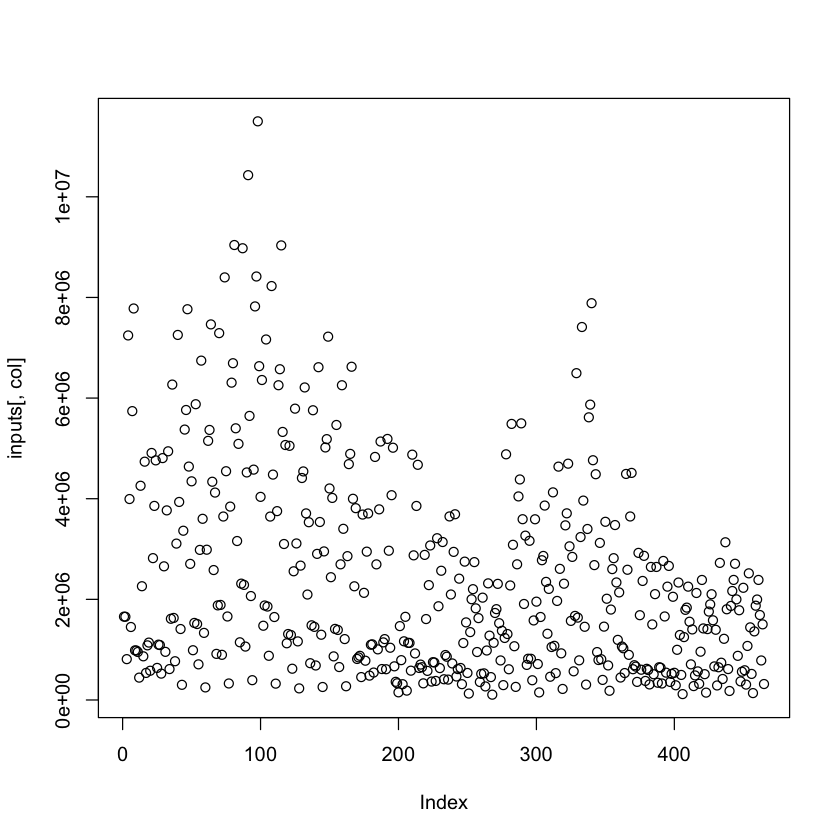

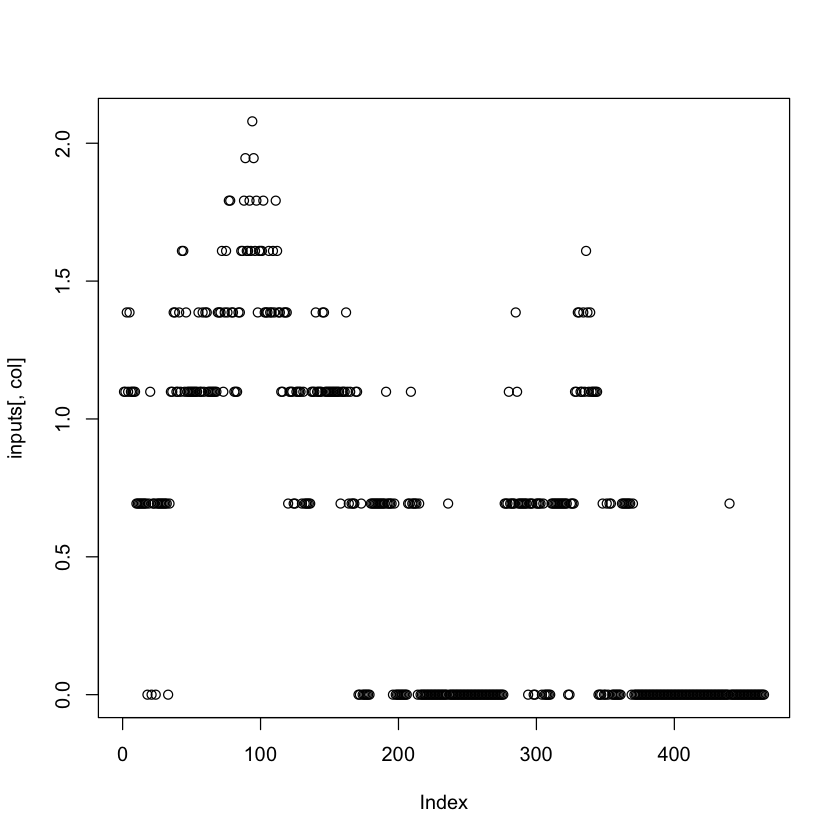

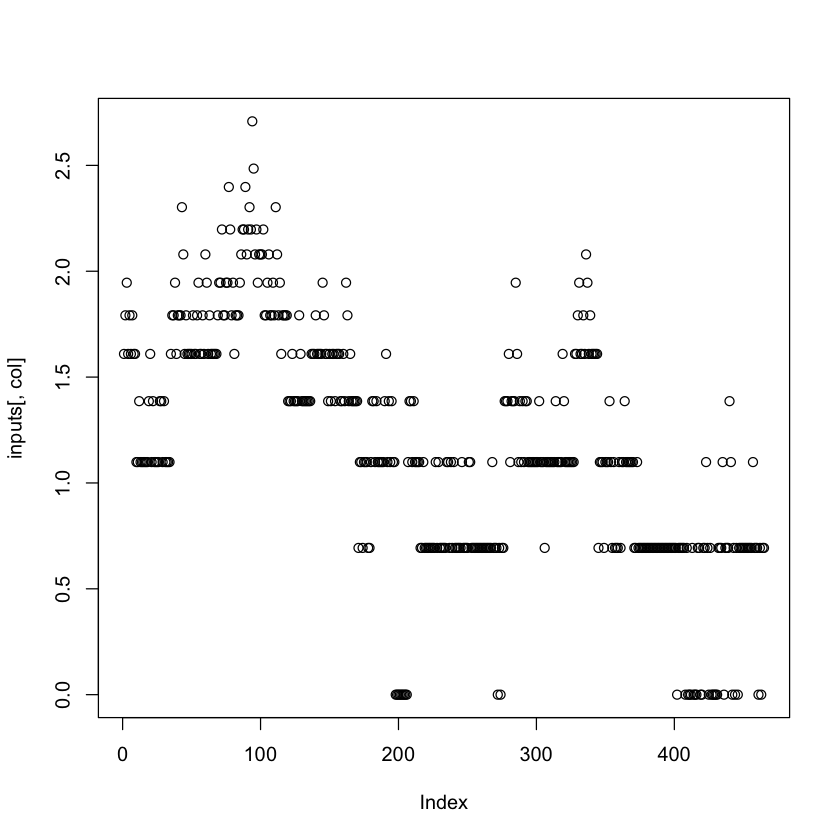

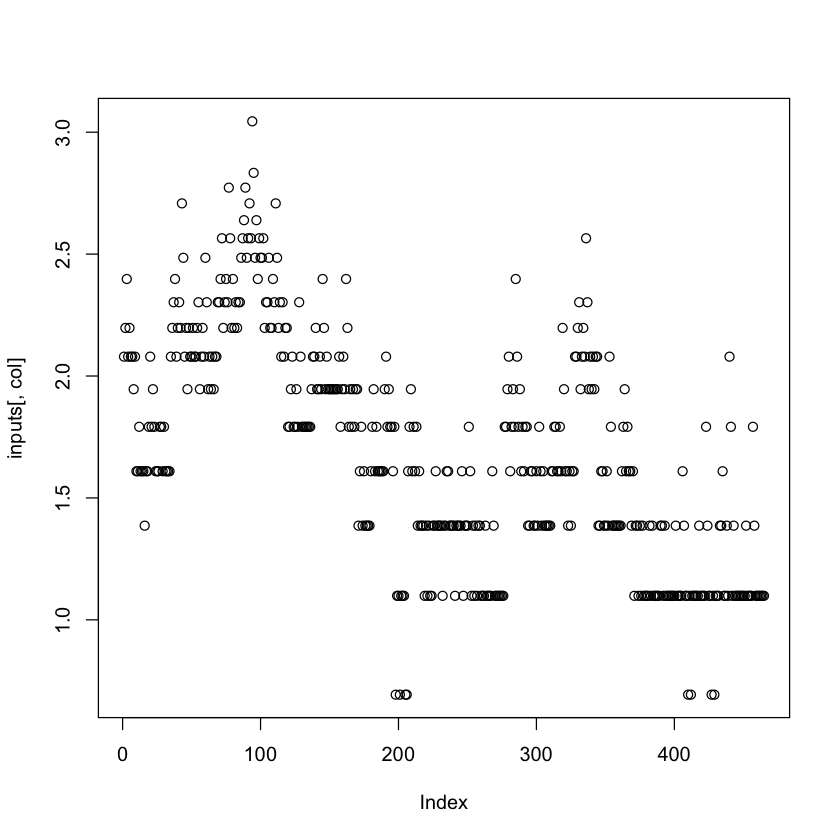

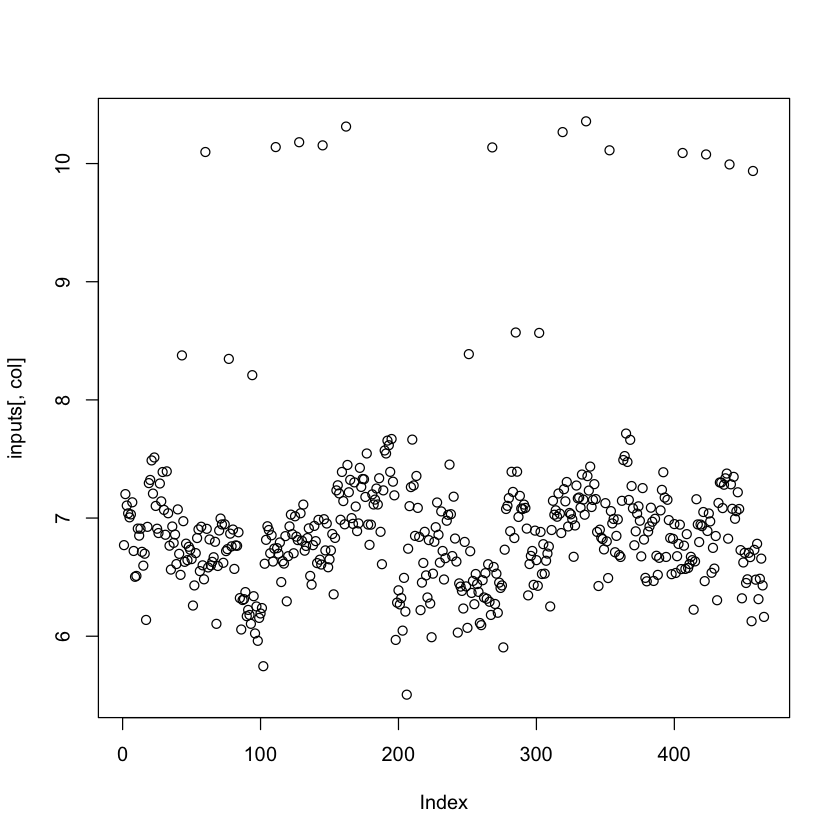

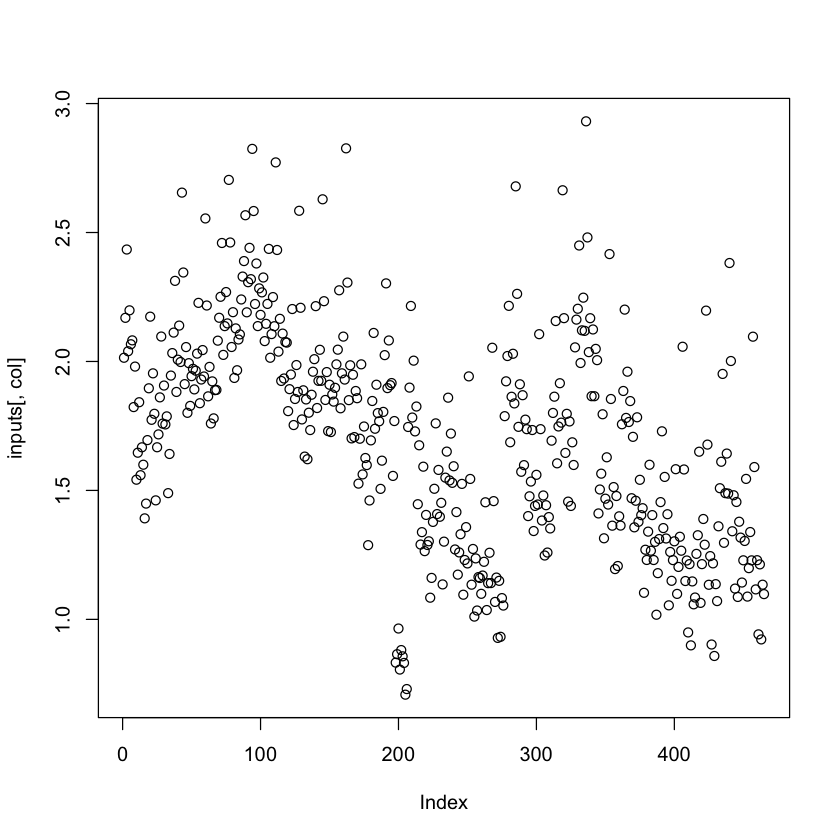

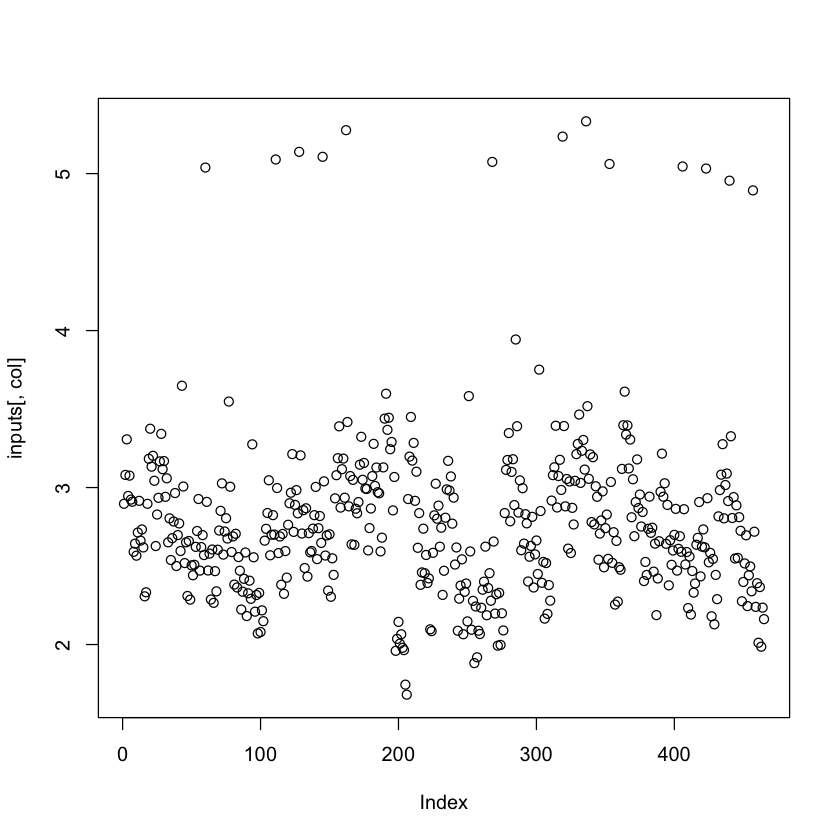

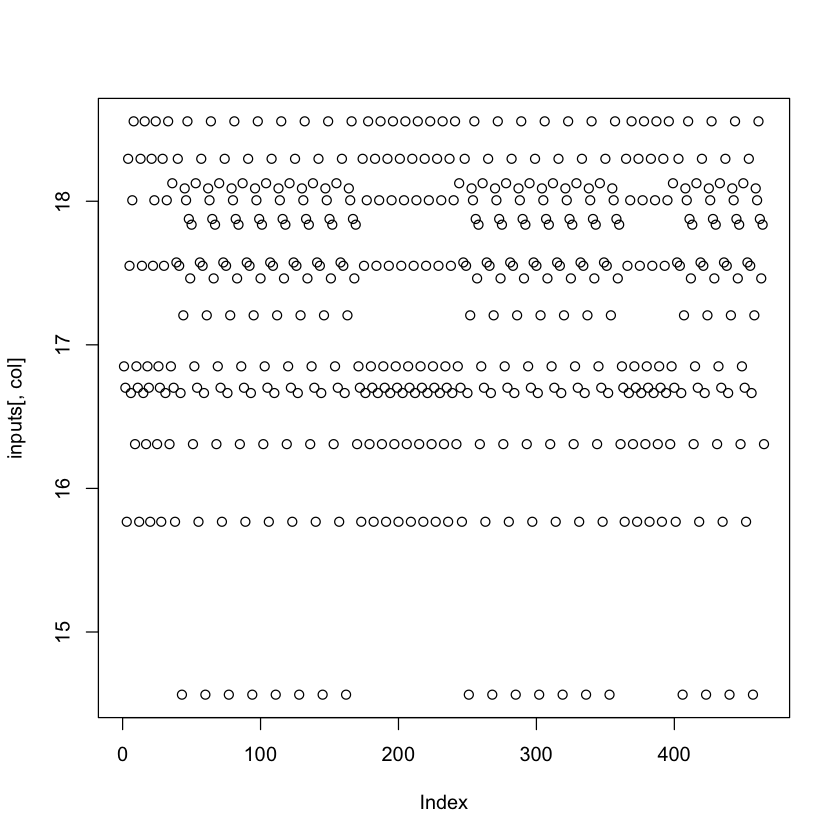

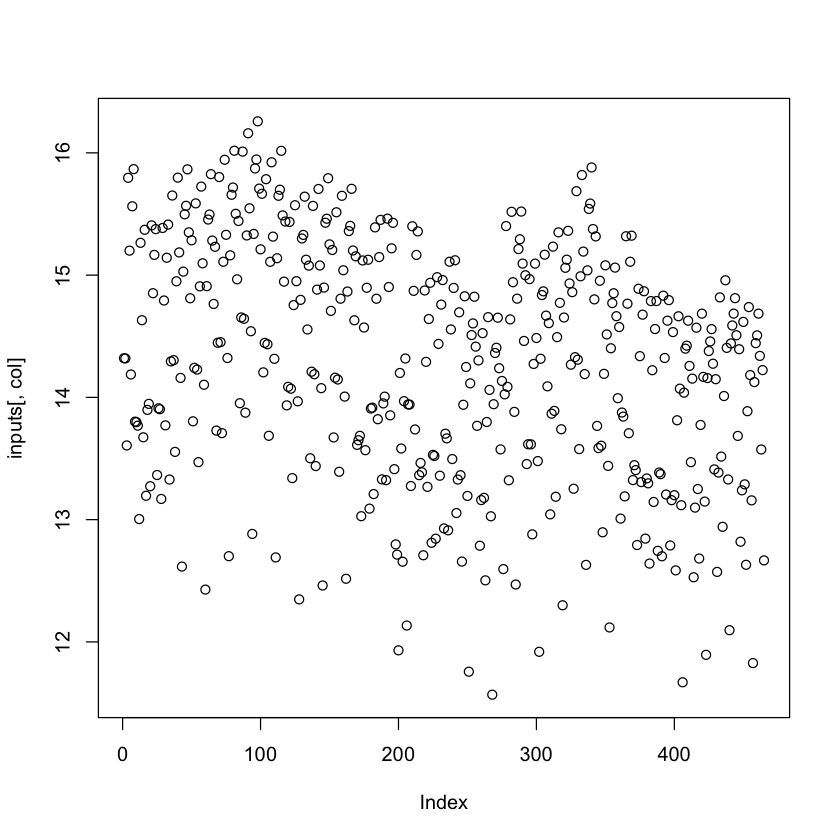

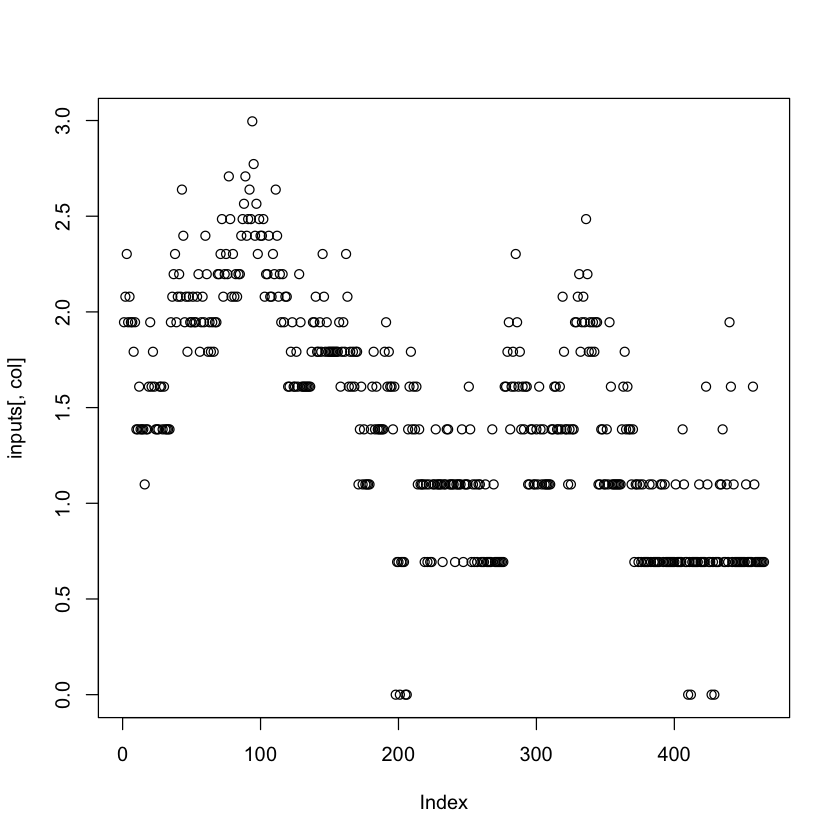

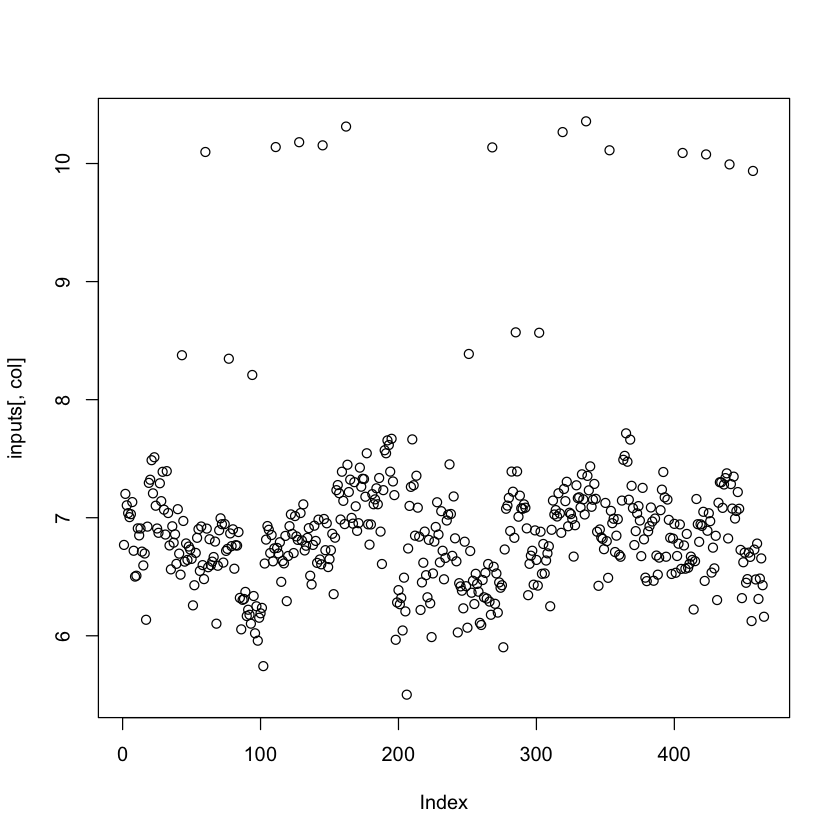

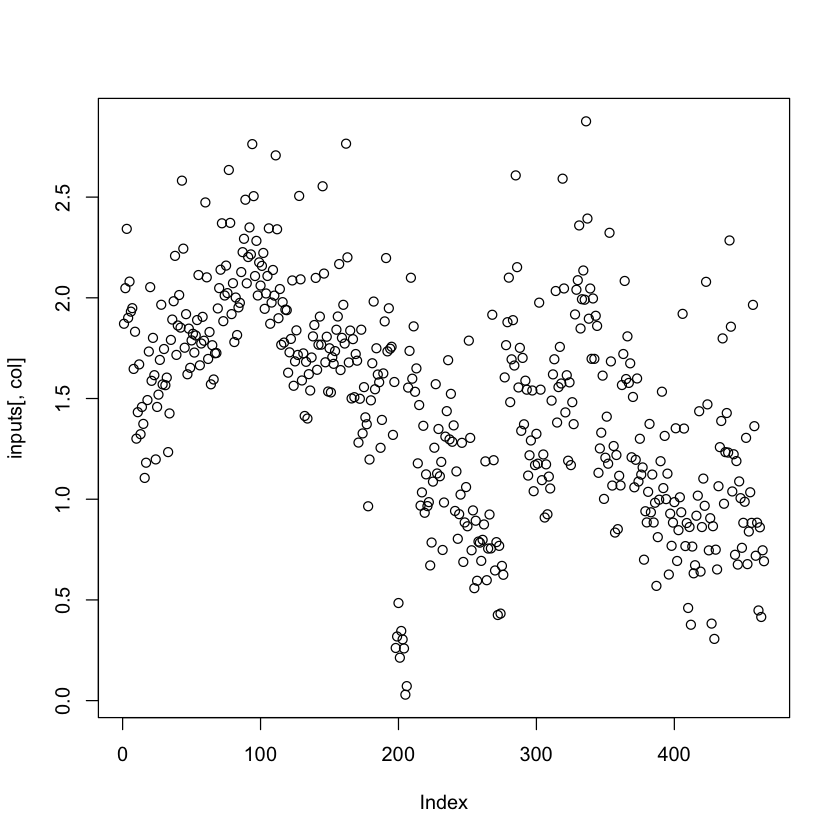

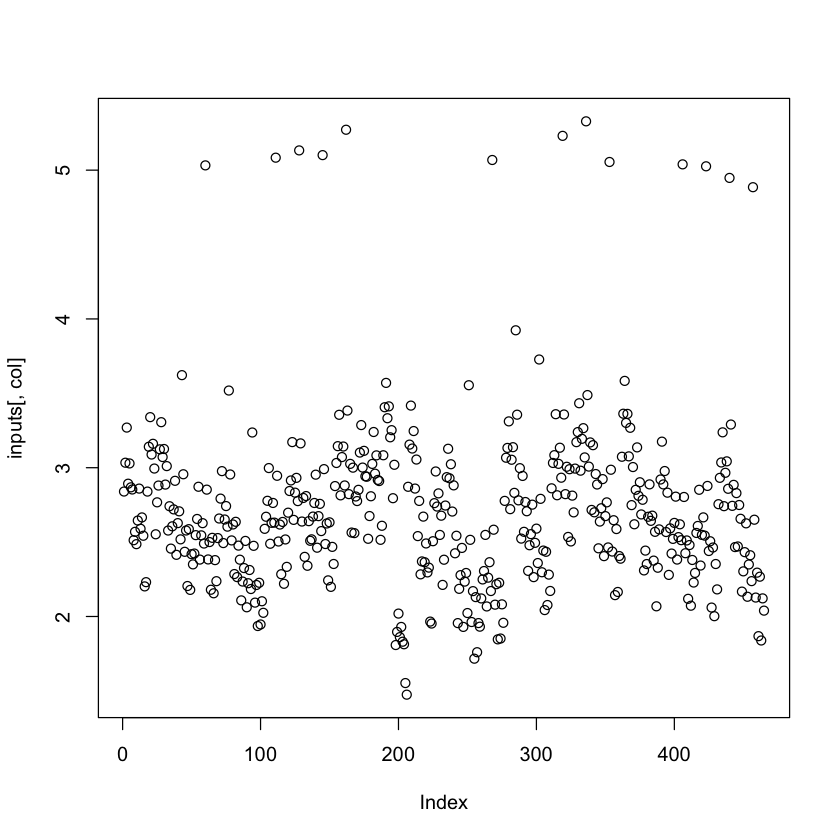

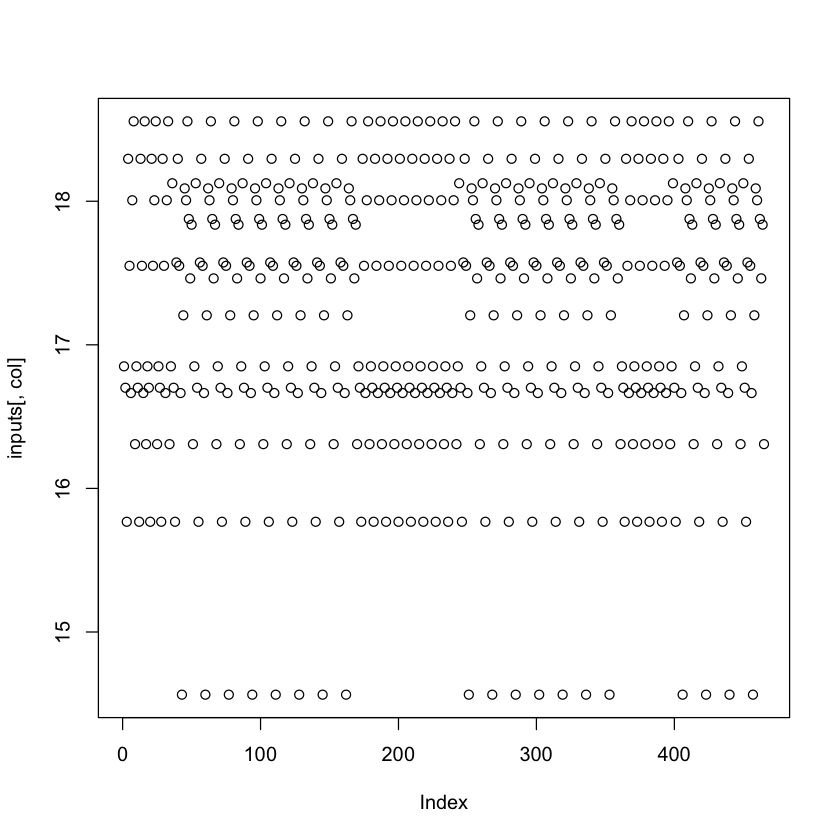

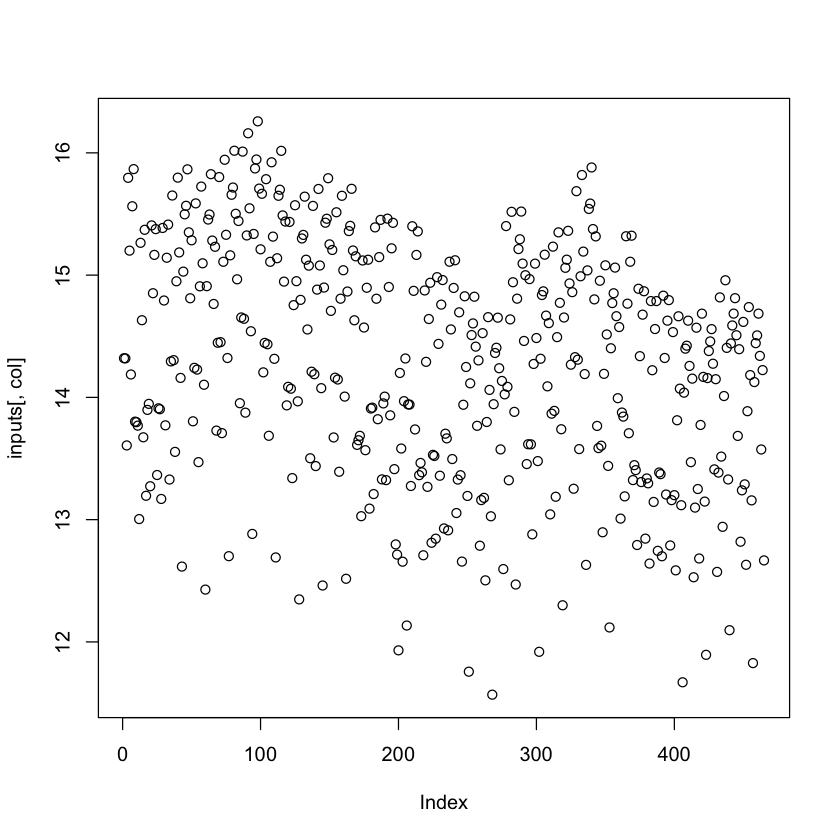

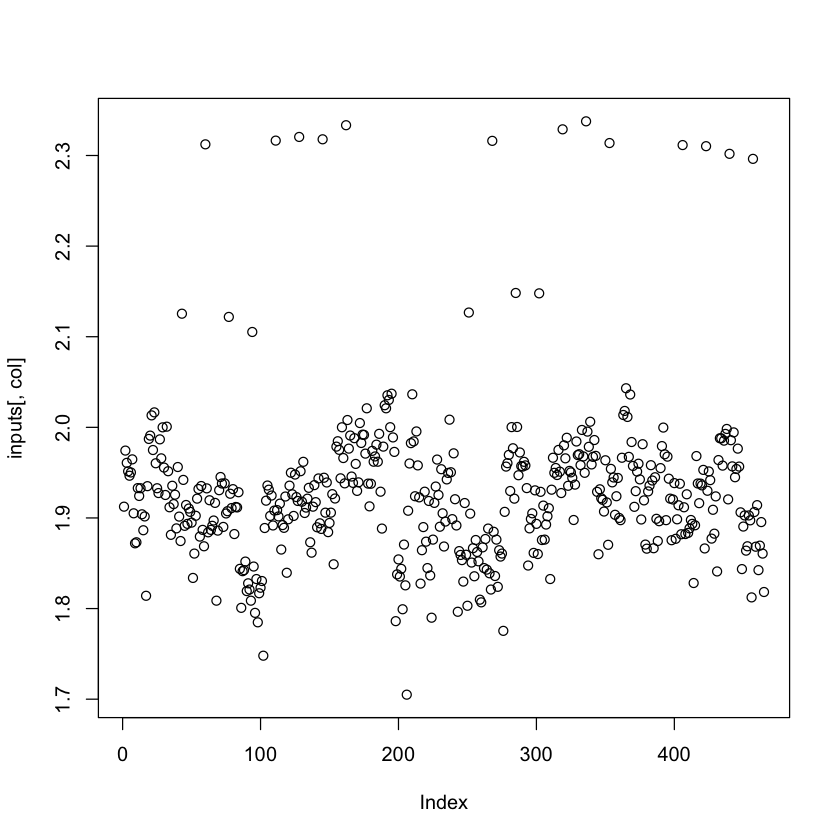

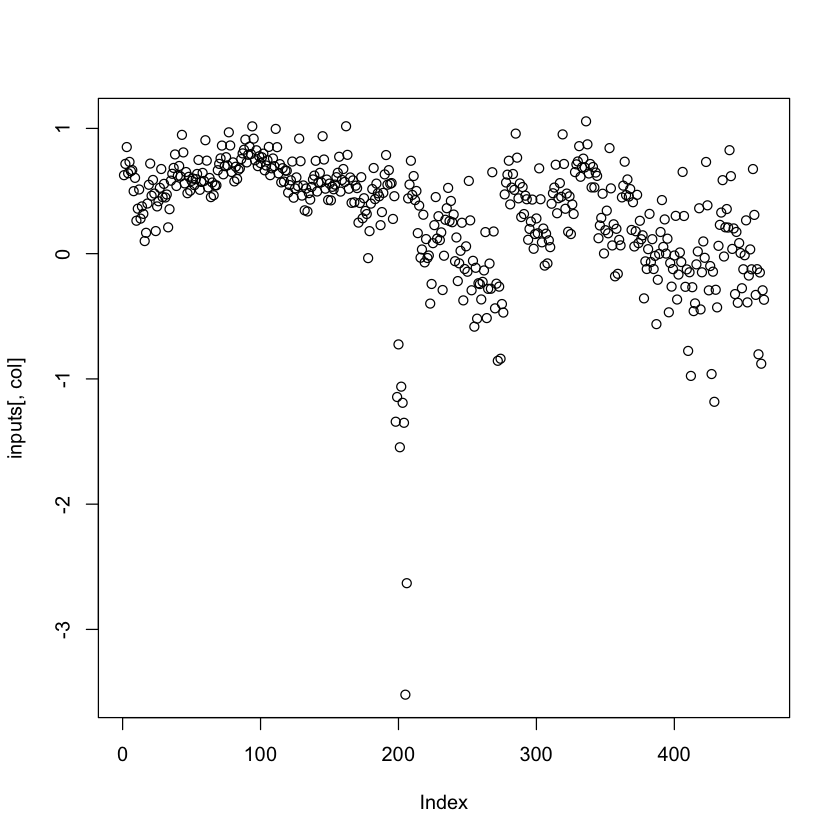

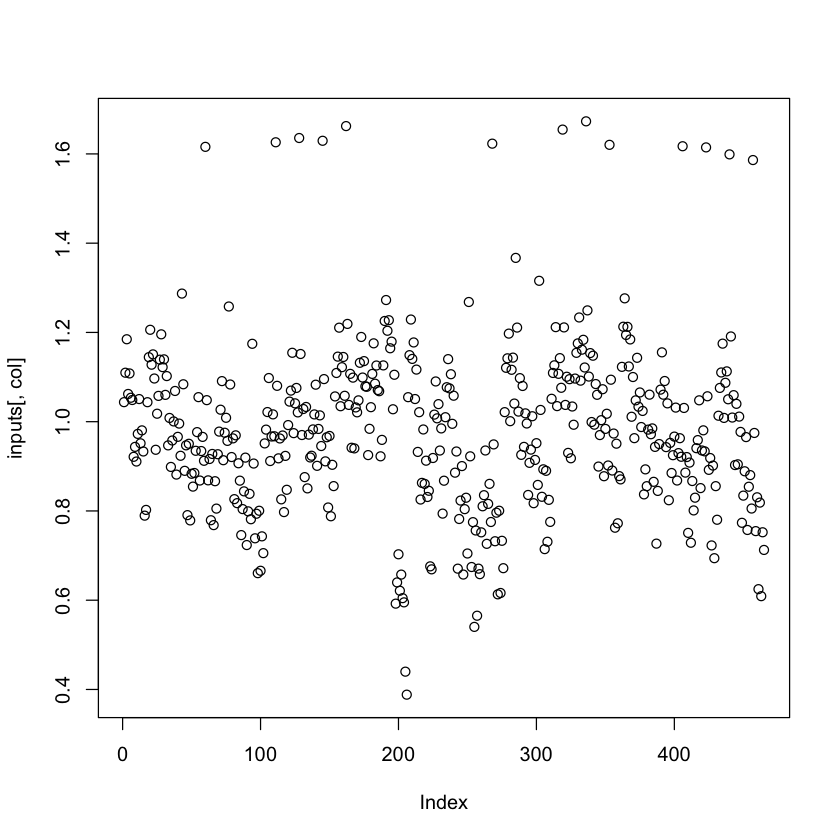

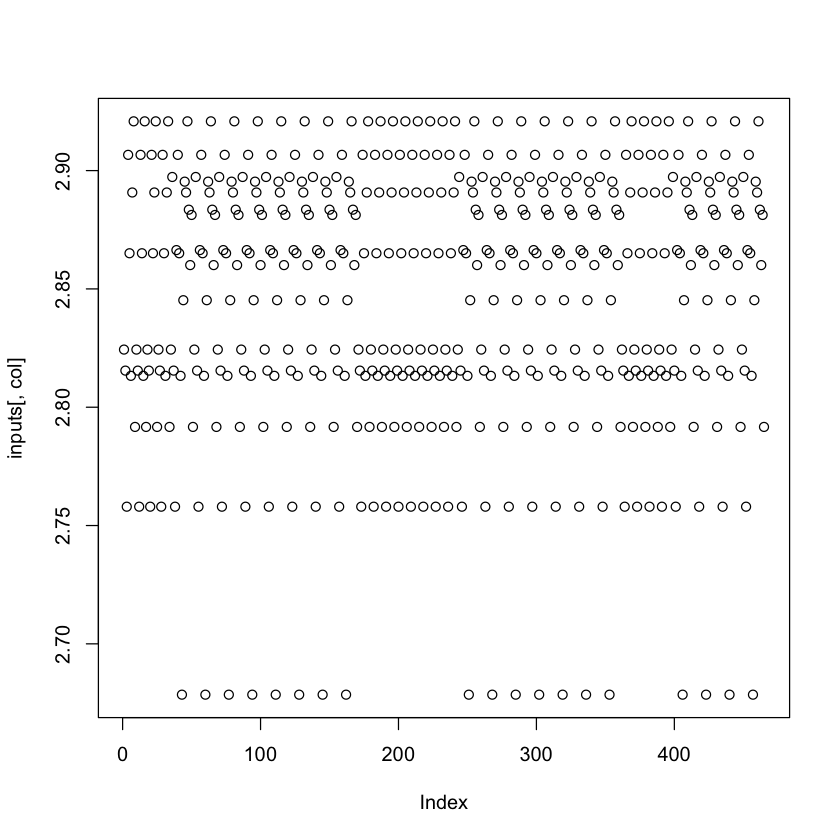

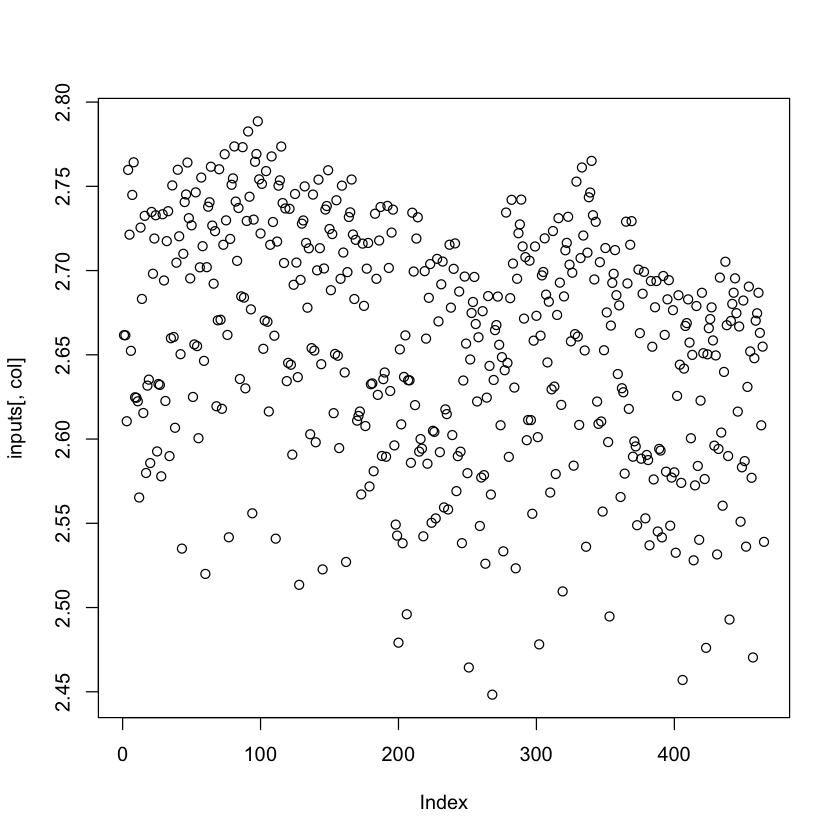

In [14]:
for(col in colnames(inputs)){
    plot(inputs[,col])
}